<a href="https://colab.research.google.com/github/Zh-Gong/Reaction-Diffusion-TensorFlow/blob/main/BTCS_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$
 \frac{\partial u}{\partial t}=D(u_{xx}+u_{yy})+\lambda u(t,x,y) \\
 u(t, x, y) = U(t)V (x, y) \\
  u_t=V\frac{\partial u}{\partial t}\\
 u_{xx}=U\frac{\partial ^2 u}{\partial x^2}\\
 u_{yy}=U\frac{\partial ^2 u}{\partial y^2}\\
 \frac{1}{U}\frac{\partial U}{\partial t}=D\left(\frac{1}{U}\right)+\lambda\\
 U^\prime(t)=(Dk+λ)U(t) \\
 V(x,y)=V_{xx}+V_{yy}
$$

# Neumann boundary

1D Dirichlet boundary conditions:
\begin{aligned}
& u_t=\alpha^2 u_{x x}+f(u) \quad 0<x<L, 0<t<\infty \\
& u(0, t)=A \quad 0<t<\infty \\
& u(L, t)=B \quad 0<t<\infty \\
& u(x, 0)=\phi(x) \quad 0 \leq x \leq L \\
&
\end{aligned}
if $A=B=0$ AND $f(u)=0$ for Any $u(x,t)$:
$$ u_{0,n}=0\\
u_{M,n}=0
$$

\begin{equation}
\left[\begin{array}{c}
u_{1, n+1} \\
u_{2, n+1} \\
\vdots \\
u_{M-1, n+1}
\end{array}\right]=\left[\begin{array}{ccccc}
a & b & 0 & \ldots & 0 \\
b & a & b & \ldots & 0 \\
0 & \ddots & \ddots & \ddots & 0 \\
\vdots & & & & \vdots \\
0 & 0 & \ldots & b & a
\end{array}\right]
\left[\begin{array}{c}
u_{1, n} \\
u_{2, n} \\
\vdots \\
u_{M-1, n}
\end{array}\right]
\end{equation}

if NOT:
\begin{equation}
\left[\begin{array}{c}
u_{1, n+1} \\
u_{2, n+1} \\
\vdots \\
u_{M-1, n+1}
\end{array}\right]=\left[\begin{array}{ccccc}
b & a & b & 0 & \ldots & 0 \\
0 & b & a & b & \ldots & 0 \\
0 & \ddots & \ddots & \ddots & \ddots & 0 \\
\vdots & & & & &\vdots \\
0 & \ldots & b & a & b & 0\\
0 & 0 & \ldots & b & a & b
\end{array}\right]
\left[\begin{array}{c}
u_{0, n} \\
u_{1, n} \\
u_{2, n} \\
\vdots \\
u_{M-1, n}\\
u_{M, n}
\end{array}\right] + Δt
\left[\begin{array}{c}
f(u_{1, n}) \\
f(u_{2, n}) \\
\vdots \\
f(u_{M-1, n})
\end{array}\right]
\end{equation}
for any $n,n+1 \dots$:
$$ u_{0,n}=A\\
u_{M,n}=B
$$
The RHS is a (M-1) by (M+1) matrix<p>
You can still using the boundary of A and B to push push this iteration forward

1D Neumann boundary conditions:

\begin{aligned}
& u_t=\alpha^2 u_{x x}+f(u) \quad 0<x<L, 0<t<\infty \\
& u_x(0, t)=A \quad 0<t<\infty \\
& u_x(L, t)=B \quad 0<t<\infty \\
& u(x, 0)=\phi(x) \quad 0 \leq x \leq L \\
&
\end{aligned}


at boundary:
$$ {u_{1,n}-u_{0,n}\over Δx}=A\\
{u_{M,n}-u_{M-1,n}\over Δx}=B
$$
Calculate the $u_{0,n+1}$ and $u_{M,n+1}$ from
$$
u_{0,n}=u_{1,n}-{Δx} A\\
u_{M,n}=u_{M-1,n}+{Δx} B\\
$$
Then push the iteration forward with the same matrix calculation

# 1D to 2D

for 1D:
$$
\frac{u_{i, n+1}-u_{i, n}}{\Delta t}=\alpha^2 \frac{u_{i+1, n}-2 u_{i, n}+u_{i-1, n}}{(\Delta x)^2}+f(u_{i,n})
$$
for 2D:
$$
\frac{u_{i, j}^{n+1}-u_{i, j}^{n}}{\Delta t}=\alpha^2 \left(\frac{u_{i+1, j}^n-2 u_{i, j}^n+u_{i-1, j}^n}{(\Delta x)^2}+\frac{u_{i, j+1}^n-2 u_{i, j}^n+u_{i, j-1}^n}{(\Delta y)^2}\right)+f(u_{i,j}^n)\\
 u_{i, j}^{n+1}=\gamma(u_{i+1, j}^n+u_{i-1,j}^n-2u_{i, j}^n)+\lambda(u_{i, j+1}^n+u_{i, j-1}^n-2u_{i, j}^n)+ F(u_{i,j}^n)\\
$$
Where:
$$
γ= {α^2Δt\over{(\Delta x)^2}} \quad λ= {α^2Δt\over{(\Delta y)^2}} \\
F(u_{i,j}^n)=\Delta tf(u_{i,j}^n)+u_{i,j}^n\
$$

Expand the matrix:<p>
the 2D-XY is divided into $(i+1) \times (j+1)$ grid
\begin{equation}
\left[\begin{array}{c}
u_{1,1}^{n+1} & u_{1,2}^{n+1}& \ldots &u_{1,j-1}^{n+1}\\
u_{2,1}^{n+1} & u_{2,2}^{n+1}& \ldots &u_{2,j-1}^{n+1}\\
\vdots & \vdots & \ddots & \vdots\\
u_{i-1,1}^{n+1}& u_{i-1,2}^{n+1}&\ldots & u_{i-1,j-1}^{n+1}
\end{array}\right]= \text{Conv}
\left[\begin{array}{c}
u_{0,0}^{n} & u_{0,1}^{n} & u_{0,2}^{n}& \ldots &u_{0,j-1}^{n}&u_{0,j}^{n}\\
u_{1,0}^{n} & u_{1,1}^{n} & u_{1,2}^{n}& \ldots &u_{1,j-1}^{n}&u_{1,j}^{n}\\
u_{2,0}^{n} & u_{2,1}^{n} & u_{2,2}^{n}& \ldots &u_{2,j-1}^{n}&u_{2,j}^{n}\\
\vdots &\vdots & \vdots & \ddots & \vdots & \vdots\\
u_{i-1,0}^{n}& u_{i-1,1}^{n}&\ldots&\ldots & u_{i-1,j-1}^{n}& u_{i-1,j}^{n}\\
u_{i,0}^{n}& u_{i,1}^{n}&\ldots&\ldots & u_{i,j-1}^{n}& u_{i,j}^{n}
\end{array}\right] +
\left[\begin{array}{c}
F(u_{1,1}^{n}) & F(u_{1,2}^{n})& \ldots &F(u_{1,j-1}^{n})\\
F(u_{2,1}^{n}) & F(u_{2,2}^{n})& \ldots &F(u_{2,j-1}^{n})\\
\vdots & \vdots & \ddots & \vdots\\
F(u_{i-1,1}^{n})& F(u_{i-1,2}^{n})&\ldots & F(u_{i-1,j-1}^{n})
\end{array}\right]
\end{equation}

Conv is the convolution layer of $3\times 3$ kernal with the filter as:
$$
\left[\begin{array}{ccccc}
 0 & λ & 0  \\
 γ & -2(γ+λ) & γ \\
0 & λ & 0
\end{array}\right]
$$
result is $(i-1)×(j-1)$ Matrix<p>

To push the iteration forward, <p>
Calculate with Nueman boundary
$$
u_{0,j}=u_{1,j}-{Δx} C_{left}\\
u_{I,j}=u_{I-1,j}+{Δx} C_{right}\\
u_{i,0}=u_{i,1}-{Δy} C_{lower}\\
u_{i,J}=u_{i,J-1}+{Δy} C_{upper}\\
$$

write the numerical solution for:
$$u(t,x,y)=(\cos 2\pi x+\cos2\pi y)e^{-\pi^2t}$$
It satisfies the PDE:
$$
u_t=-\pi^2(\cos 2\pi x+\cos2\pi y)e^{-\pi^2t}\\
u_x=-2\pi e^{-\pi^2t} \sin(2\pi x)  \\
u_{xx}= -4\pi^2 e^{-\pi^2t} \cos(2\pi x)\\
u_{yy}= -4\pi^2 e^{-\pi^2t} \cos(2\pi y)\\
u_{xx}+u_{yy}=-4\pi^2(\cos 2\pi x+\cos2\pi y)e^{-\pi^2t} \\
u_t=u_{xx}+u_{yy}+3\pi^2u(t,x,y) \\
u(0,x,y)=\cos 2\pi x+\cos2\pi y\\
 \text{Neumann Boundary is: } 0\\
 x,y \in (0,1)
$$

In [ ]:
import numpy as np

def FTCS_2D(dt,dx,dy,T,W,H):

  I=int(W/dx)
  J=int(H/dy)
  result=np.zeros((T+1,I+1,J+1))
  if dt>1/(2*(1/dx**2+1/dy**2)):
    raise ValueError("Try a smaller delta-t!")

  result=np.zeros((T+1,I+1,J+1))
  # set the grid

  # set initial conditions
  result[0,:,:]=(np.cos(np.arange(I+1)*dx*np.pi*2).reshape((I+1,1)))+(np.cos(np.arange(J+1)*dy*np.pi*2))

  gamma=dt/(dx**2)
  lamb=dt/(dy**2)

  for t in range(1,T+1):
    for i in range(1,I):
      for j in range(1,J):
        R1=gamma*(result[t-1,i-1,j]+result[t-1,i+1,j]-2*result[t-1,i,j])
        R2=lamb*(result[t-1,i,j-1]+result[t-1,i,j+1]-2*result[t-1,i,j])
        result[t,i,j]=R1+R2+result[t-1,i,j]+dt*(np.pi**2)*3*result[t-1,i,j]
    # Neumann Boundary
    result[t,0,:]=result[t,1,:]
    result[t,I,:]=result[t,I-1,:]
    result[t,:,0]=result[t,:,1]
    result[t,:,J]=result[t,:,J-1]

  return result

In [ ]:
def abs_sol(dt,dx,dy,T,W,H):
  I=int(W/dx)
  J=int(H/dy)
  result=np.zeros((T+1,I+1,J+1))

  XY=(np.cos(np.arange(I+1)*dx*np.pi*2).reshape((I+1,1)))+(np.cos(np.arange(J+1)*dy*np.pi*2))
  XY=XY.reshape((1,I+1,J+1))

  for t in range(T+1):
    result[t,:,:]=np.exp(-t*dt*(np.pi**2))*XY

  return result

In [ ]:
sol_0=abs_sol(0.0025,0.1,0.1,40,1,1)
num_0=FTCS_2D(0.0025,0.1,0.1,40,1,1)
dif_10=sol_0-num_0

In [ ]:
sol_1=abs_sol(0.000625,0.05,0.05,160,1,1)
num_1=FTCS_2D(0.000625,0.05,0.05,160,1,1)
dif_20=sol_1-num_1

sol_2=abs_sol(0.000125,0.025,0.025,800,1,1)
num_2=FTCS_2D(0.000125,0.025,0.025,800,1,1)
dif_40=sol_2-num_2

In [ ]:
sol_3=abs_sol(0.0001,0.02,0.02,1000,1,1)
num_3=FTCS_2D(0.0001,0.02,0.02,1000,1,1)
dif_50=sol_3-num_3

In [ ]:
sol=abs_sol(0.00001,0.01,0.01,10000,1,1)
num=FTCS_2D(0.00001,0.01,0.01,10000,1,1)

In [ ]:
sol4=abs_sol(0.0001,0.05,0.05,1000,1,1)
num4=FTCS_2D(0.0001,0.05,0.05,1000,1,1)
dif_20_1k=sol4-num4

In [ ]:
d_20=dif_20.max(axis=(1,2))

In [ ]:
d_50=dif_50.max(axis=(1,2))

In [ ]:
d_100=(sol-num).max(axis=(1,2))

In [ ]:
d_40=dif_40.max(axis=(1,2))

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation

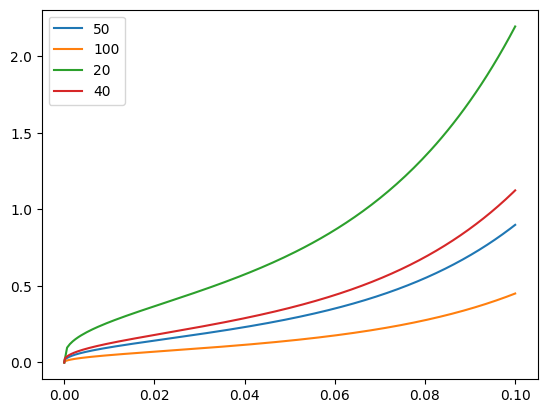

In [ ]:
# print the maxixmum diffrence of each time steps btw analytical solution and numerical solution
plt.clf()
plt.plot(np.linspace(0,0.1,1001),d_50,label='50')
plt.plot(np.linspace(0,0.1,10001),d_100,label='100')
plt.plot(np.linspace(0,0.1,161),d_20,label='20')
plt.plot(np.linspace(0,0.1,801),d_40,label='40')

plt.legend()

<ipython-input-18-69b5f63a09f0>:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.linspace(0,0.1,10001),np.log(d_100))


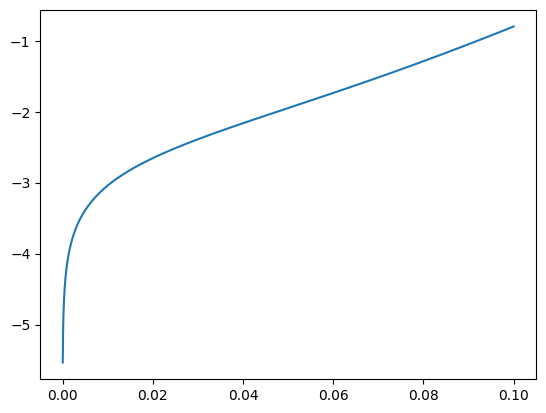

In [ ]:
plt.plot(np.linspace(0,0.1,10001),np.log(d_100))

In [ ]:
import numpy as np

def FTCS_2D(dt,dx,dy,T,W,H):

  I=int(W/dx)
  J=int(H/dy)
  result=np.zeros((T+1,I+1,J+1))
  if dt>1/(2*(1/dx**2+1/dy**2)):
    raise ValueError("Try a smaller delta-t!")

  result=np.zeros((T+1,I+1,J+1))
  # set the grid

  # set initial conditions
  result[0,:,:]=(np.cos(np.arange(I+1)*dx*np.pi*2).reshape((I+1,1)))+(np.cos(np.arange(J+1)*dy*np.pi*2))

  gamma=dt/(dx**2)
  lamb=dt/(dy**2)

  for t in range(1,T+1):
    for i in range(1,I):
      for j in range(1,J):
        R1=gamma*(result[t-1,i-1,j]+result[t-1,i+1,j]-2*result[t-1,i,j])
        R2=lamb*(result[t-1,i,j-1]+result[t-1,i,j+1]-2*result[t-1,i,j])
        result[t,i,j]=R1+R2+result[t-1,i,j]+dt*(np.pi**2)*3*result[t-1,i,j]
    # Neumann Boundary
    result[t,0,:]=result[t,1,:]
    result[t,I,:]=result[t,I-1,:]
    result[t,:,0]=result[t,:,1]
    result[t,:,J]=result[t,:,J-1]

  return result

In [ ]:
plt.plot(np.linspace(0,0.1,501),dif_20_1k.max(axis=(1,2)))

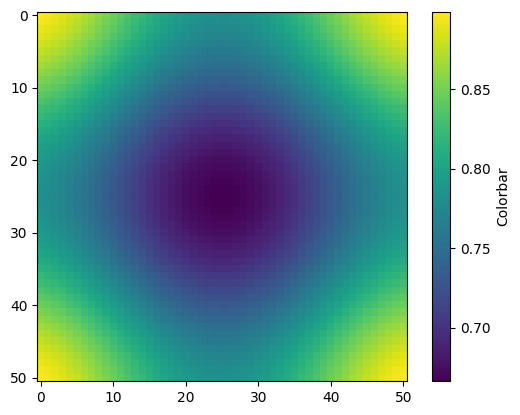

In [ ]:
im = plt.imshow(dif_50[-1])

cbar = plt.colorbar(im)
cbar.set_label("Colorbar")

plt.show()

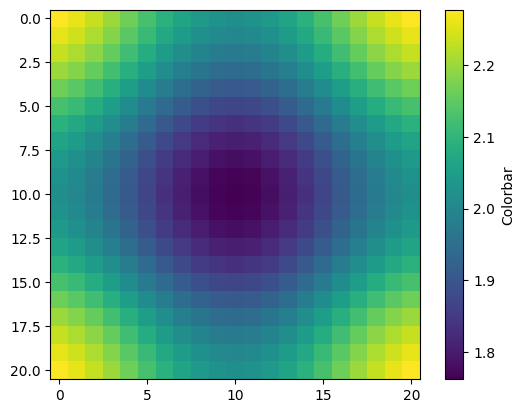

In [ ]:
im = plt.imshow(dif_20_1k[-1])

cbar = plt.colorbar(im)
cbar.set_label("Colorbar")

plt.show()

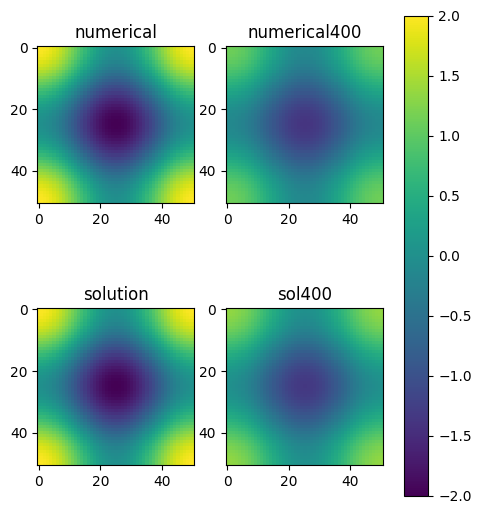

In [ ]:
from matplotlib import colors
Nr = 2
Nc = 2

fig, axs = plt.subplots(Nr, Nc)

images = []

images.append(axs[0][0].imshow(num_2[0]))
images.append(axs[0][1].imshow(num[100]))
images.append(axs[1][0].imshow(sol[0]))
images.append(axs[1][1].imshow(sol[100]))

axs[0][0].title.set_text('numerical')
axs[0][1].title.set_text('numerical400')
axs[1][0].title.set_text('solution')
axs[1][1].title.set_text('sol400')

plt.subplots_adjust(bottom=0, right=0.8, top=1)

# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)

fig.colorbar(images[0], ax=axs)

fig.show()

write the numerical solution for:
$$u(t,x,y)=\cos (2\pi x)\cos(2\pi y)e^{-\pi^2t}$$
It satisfies the PDE:
$$
u_t=-\pi^2\cos (2\pi x)\cos(2\pi y)e^{-\pi^2t}\\
u_x=-2\pi e^{-\pi^2t} \cos(2\pi y)\sin(2\pi x)  \\
u_{xx}= -4\pi^2 e^{-\pi^2t} \cos(2\pi x)\cos(2\pi y)\\
u_{yy}= -4\pi^2 e^{-\pi^2t} \cos(2\pi x)\cos(2\pi y)\\
u_{xx}+u_{yy}=-8\pi^2 e^{-\pi^2t} \cos(2\pi x)\cos(2\pi y) \\
u_t=u_{xx}+u_{yy}+7\pi^2u(t,x,y) \\
u(0,x,y)=\cos (2\pi x)\cos(2\pi y)\\
 \text{Neumann Boundary is: } 0\\
 x,y \in (0,1)
$$

In [ ]:
import numpy as np

def FTCS_2D(dt,dx,dy,T,W,H):

  I=int(W/dx)
  J=int(H/dy)
  result=np.zeros((T+1,I+1,J+1))
  if dt>1/(2*(1/dx**2+1/dy**2)):
    raise ValueError("Try a smaller delta-t!")

  result=np.zeros((T+1,I+1,J+1))
  # set the grid

  # set initial conditions
  result[0,:,:]=(np.cos(np.arange(I+1)*dx*np.pi*2).reshape((I+1,1)))*(np.cos(np.arange(J+1)*dy*np.pi*2))

  gamma=dt/(dx**2)
  lamb=dt/(dy**2)

  for t in range(1,T+1):
    for i in range(1,I):
      for j in range(1,J):
        R1=gamma*(result[t-1,i-1,j]+result[t-1,i+1,j]-2*result[t-1,i,j])
        R2=lamb*(result[t-1,i,j-1]+result[t-1,i,j+1]-2*result[t-1,i,j])
        result[t,i,j]=R1+R2+result[t-1,i,j]+dt*(np.pi**2)*7*result[t-1,i,j]
    # Neumann Boundary
    result[t,0,:]=result[t,1,:]
    result[t,I,:]=result[t,I-1,:]
    result[t,:,0]=result[t,:,1]
    result[t,:,J]=result[t,:,J-1]

  return result

def abs_sol(dt,dx,dy,T,W,H):
  I=int(W/dx)
  J=int(H/dy)
  result=np.zeros((T+1,I+1,J+1))

  XY=(np.cos(np.arange(I+1)*dx*np.pi*2).reshape((I+1,1)))*(np.cos(np.arange(J+1)*dy*np.pi*2))
  XY=XY.reshape((1,I+1,J+1))

  for t in range(T+1):
    result[t,:,:]=np.exp(-t*dt*(np.pi**2))*XY

  return result

In [ ]:
sol_3=abs_sol(0.0001,0.02,0.02,2000,1,1)
num_3=FTCS_2D(0.0001,0.02,0.02,2000,1,1)
dif_50=sol_3-num_3
d_50=dif_50.max(axis=(1,2))

sol_1=abs_sol(0.000625,0.05,0.05,320,1,1)
num_1=FTCS_2D(0.000625,0.05,0.05,320,1,1)
dif_20=sol_1-num_1

sol_2=abs_sol(0.000125,0.025,0.025,1600,1,1)
num_2=FTCS_2D(0.000125,0.025,0.025,1600,1,1)
dif_40=sol_2-num_2

d_20=dif_20.max(axis=(1,2))
d_40=dif_40.max(axis=(1,2))

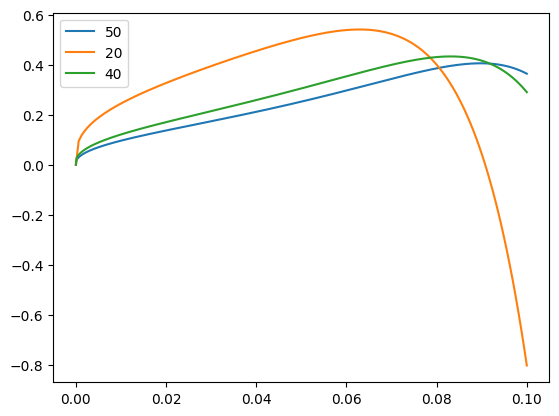

In [ ]:
plt.clf()
plt.plot(np.linspace(0,0.1,1001),d_50[:1001],label='50')
# plt.plot(np.linspace(0,0.1,10001),d_100,label='100')
plt.plot(np.linspace(0,0.1,161),d_20[:161],label='20')
plt.plot(np.linspace(0,0.1,801),d_40[:801],label='40')

plt.legend()

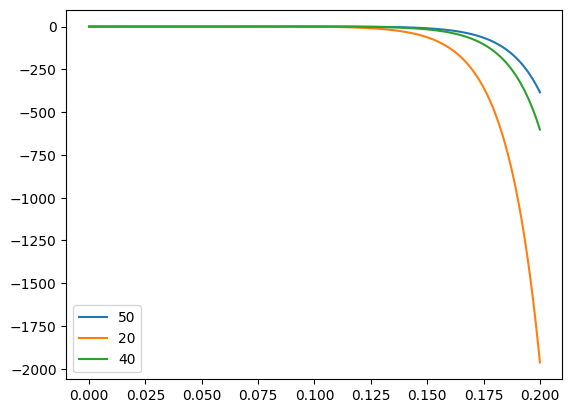

In [ ]:
plt.clf()
plt.plot(np.linspace(0,0.2,2001),d_50,label='50')
# plt.plot(np.linspace(0,0.2,10001),d_100,label='100')
plt.plot(np.linspace(0,0.2,321),d_20,label='20')
plt.plot(np.linspace(0,0.2,1601),d_40,label='40')

plt.legend()

Add 'ghost padding'

In [ ]:
import numpy as np

def FTCS_2D(dt,dx,dy,T,W,H):

  I=int(W/dx)
  J=int(H/dy)
  result=np.zeros((T+1,I+1,J+1))
  if dt>1/(2*(1/dx**2+1/dy**2)):
    raise ValueError("Try a smaller delta-t!")

  result=np.zeros((T+1,I+1,J+1))
  # set the grid

  # set initial conditions
  result[0,:,:]=(np.cos(np.arange(I+1)*dx*np.pi*2).reshape((I+1,1)))*(np.cos(np.arange(J+1)*dy*np.pi*2))

  gamma=dt/(dx**2)
  lamb=dt/(dy**2)

  for t in range(1,T+1):
    ghost=np.zeros((I+3,J+3))
    ghost[1:-1,1:-1]=result[t-1,:,:]
     # Neumann Boundary
    ghost[0,:]=ghost[2,:]
    ghost[I+2,:]=ghost[I,:]
    ghost[:,0]=ghost[:,2]
    ghost[:,J+2]=ghost[:,J]

    for i in range(1,I+2):
      for j in range(1,J+2):
        R1=gamma*(ghost[i-1,j]+ghost[i+1,j]-2*ghost[i,j])
        R2=lamb*(ghost[i,j-1]+ghost[i,j+1]-2*ghost[i,j])
        result[t,i-1,j-1]=R1+R2+ghost[i,j]+dt*(np.pi**2)*7*ghost[i,j]

  return result

def abs_sol(dt,dx,dy,T,W,H):
  I=int(W/dx)
  J=int(H/dy)
  result=np.zeros((T+1,I+1,J+1))

  XY=(np.cos(np.arange(I+1)*dx*np.pi*2).reshape((I+1,1)))*(np.cos(np.arange(J+1)*dy*np.pi*2))
  XY=XY.reshape((1,I+1,J+1))

  for t in range(T+1):
    result[t,:,:]=np.exp(-t*dt*(np.pi**2))*XY

  return result

In [ ]:
sol_3=abs_sol(0.0001,0.05,0.05,2000,1,1)
num_3=FTCS_2D(0.0001,0.05,0.05,2000,1,1)
dif_50=sol_3-num_3
d_50=dif_50.max(axis=(1,2))

sol_1=abs_sol(0.0002,0.05,0.05,1000,1,1)
num_1=FTCS_2D(0.0002,0.05,0.05,1000,1,1)
dif_20=sol_1-num_1

sol_2=abs_sol(0.0004,0.05,0.05,500,1,1)
num_2=FTCS_2D(0.0004,0.05,0.05,500,1,1)
dif_40=sol_2-num_2

d_20=dif_20.max(axis=(1,2))
d_40=dif_40.max(axis=(1,2))

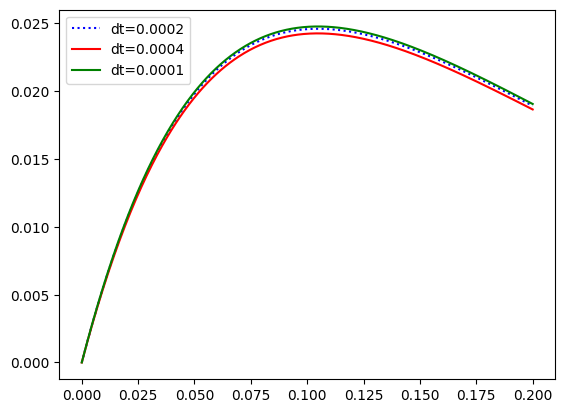

In [ ]:
plt.clf()
# plt.plot(np.linspace(0,0.2,10001),d_100,label='100')
plt.plot(np.linspace(0,0.2,1001),d_20,label='dt=0.0002',color='b',linestyle=':')
plt.plot(np.linspace(0,0.2,501),d_40,label='dt=0.0004',color='r')
plt.plot(np.linspace(0,0.2,2001),d_50,label='dt=0.0001',color='g')

plt.legend()

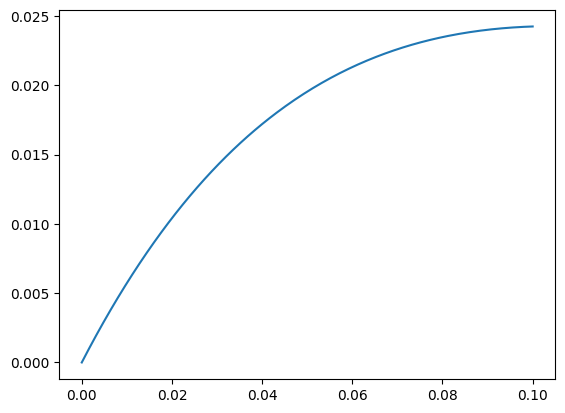

In [ ]:

NP1=FTCS_2D(0.0004,0.05,0.05,250,1,1)

AN1=abs_sol(0.0004,0.05,0.05,250,1,1)

dif_50=AN1-NP1
d_50=dif_50.max(axis=(1,2))

plt.clf()
plt.plot(np.linspace(0,0.1,251),d_50,label='50')

write the numerical solution for:
$$u(t,x,y)=\sin (2\pi x)\sin(2\pi y)e^{-\pi^2t}$$
It satisfies the PDE:
$$
u_t=-\pi^2\sin (2\pi x)\sin(2\pi y)e^{-\pi^2t}\\
u_x=2\pi e^{-\pi^2t} \cos(2\pi x)\sin(2\pi y)  \\
u_{xx}= -4\pi^2 e^{-\pi^2t} \sin(2\pi x)\sin(2\pi y)\\
u_{yy}= -4\pi^2 e^{-\pi^2t} \sin(2\pi x)\sin(2\pi y)\\
u_{xx}+u_{yy}=-8\pi^2 e^{-\pi^2t} \sin(2\pi x)\sin(2\pi y) \\
u_t=u_{xx}+u_{yy}+7\pi^2u(t,x,y) \\
u(0,x,y)=\sin (2\pi x)\sin(2\pi y)\\
 \text{Dirichlet boundary is: } 0\\
 x,y \in (0,1)
$$

In [ ]:
def FTCS_2D(dt,dx,dy,T,W,H):

  I=int(W/dx)
  J=int(H/dy)
  result=np.zeros((T+1,I+1,J+1))
  if dt>1/(2*(1/dx**2+1/dy**2)):
    raise ValueError("Try a smaller delta-t!")

  result=np.zeros((T+1,I+1,J+1))
  # set the grid

  # set initial conditions
  result[0,:,:]=(np.sin(np.arange(I+1)*dx*np.pi*2).reshape((I+1,1)))*(np.sin(np.arange(J+1)*dy*np.pi*2))

  gamma=dt/(dx**2)
  lamb=dt/(dy**2)

  for t in range(1,T+1):
    for i in range(1,I):
      for j in range(1,J):
        R1=gamma*(result[t-1,i-1,j]+result[t-1,i+1,j]-2*result[t-1,i,j])
        R2=lamb*(result[t-1,i,j-1]+result[t-1,i,j+1]-2*result[t-1,i,j])
        result[t,i,j]=R1+R2+result[t-1,i,j]+dt*(np.pi**2)*7*result[t-1,i,j]
    # Dirichlet
    result[t,0,:]=0
    result[t,I,:]=0
    result[t,:,0]=0
    result[t,:,J]=0

  return result

def abs_sol(dt,dx,dy,T,W,H):
  I=int(W/dx)
  J=int(H/dy)
  result=np.zeros((T+1,I+1,J+1))

  XY=(np.sin(np.arange(I+1)*dx*np.pi*2).reshape((I+1,1)))*(np.sin(np.arange(J+1)*dy*np.pi*2))
  XY=XY.reshape((1,I+1,J+1))

  for t in range(T+1):
    result[t,:,:]=np.exp(-t*dt*(np.pi**2))*XY

  return result

In [ ]:
sol_3=abs_sol(0.0001,0.02,0.02,2000,1,1)
num_3=FTCS_2D(0.0001,0.02,0.02,2000,1,1)
dif_50=sol_3-num_3
d_50=dif_50.max(axis=(1,2))

sol_1=abs_sol(0.000625,0.05,0.05,320,1,1)
num_1=FTCS_2D(0.000625,0.05,0.05,320,1,1)
dif_20=sol_1-num_1

sol_2=abs_sol(0.000125,0.025,0.025,1600,1,1)
num_2=FTCS_2D(0.000125,0.025,0.025,1600,1,1)
dif_40=sol_2-num_2

d_20=dif_20.max(axis=(1,2))
d_40=dif_40.max(axis=(1,2))

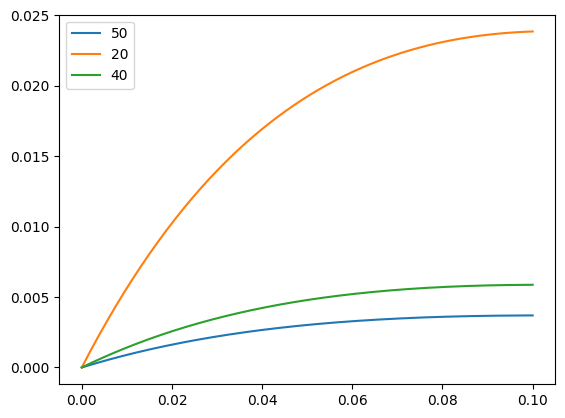

In [ ]:
plt.clf()
plt.plot(np.linspace(0,0.1,1001),d_50[:1001],label='50')
# plt.plot(np.linspace(0,0.1,10001),d_100,label='100')
plt.plot(np.linspace(0,0.1,161),d_20[:161],label='20')
plt.plot(np.linspace(0,0.1,801),d_40[:801],label='40')

plt.legend()

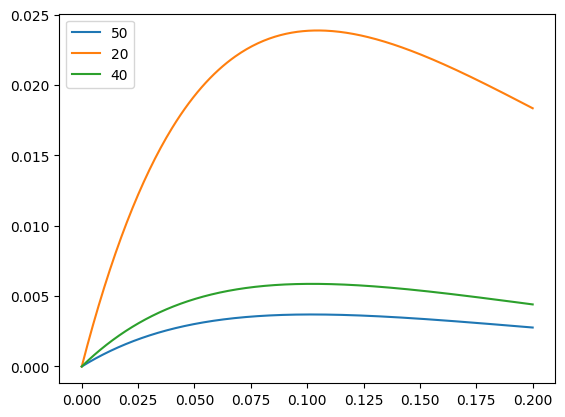

In [ ]:
plt.clf()
plt.plot(np.linspace(0,0.2,2001),d_50,label='50')
# plt.plot(np.linspace(0,0.2,10001),d_100,label='100')
plt.plot(np.linspace(0,0.2,321),d_20,label='20')
plt.plot(np.linspace(0,0.2,1601),d_40,label='40')

plt.legend()

In [ ]:
from IPython.display import HTML

In [ ]:
HTML(ani.to_html5_video())

$$
u_t=u_{xx}+u_{yy}-0.001(t,x,y) \\
u(0,x,y)=1 \quad y=0.5 \quad x= 0.5\\
 \text{Neumann Boundary is: } -0.01 \vec n\\
 x,y \in (0,1)
$$

In [ ]:
def FTCS_drop(dt,dx,dy,T,W,H):

  I=int(W/dx)
  J=int(H/dy)
  result=np.zeros((T+1,I+1,J+1))
  if dt>1/(2*(1/dx**2+1/dy**2)):
    raise ValueError("Try a smaller delta-t!")

  result=np.zeros((T+1,I+1,J+1))
  # set the grid

  # set initial conditions
  result[0,int(I/2)+1,int(J/2)+1]=1

  gamma=dt/(dx**2)
  lamb=dt/(dy**2)

  MA=gamma*np.eye(I-1,I+1)-2*gamma*np.eye(I-1,I+1,k=1)+gamma*np.eye(I-1,I+1,k=2)
  MB=lamb*np.eye(J-1,J+1)-2*lamb*np.eye(J-1,J+1,k=1)+lamb*np.eye(J-1,J+1,k=2)
  MB=MB.transpose()

  for t in range(1,T+1):
    for i in range(1,I):
      for j in range(1,J):
        R1=gamma*(result[t-1,i-1,j]+result[t-1,i+1,j]-2*result[t-1,i,j])
        R2=lamb*(result[t-1,i,j-1]+result[t-1,i,j+1]-2*result[t-1,i,j])
        result[t,i,j]=R1+R2+result[t-1,i,j]+dt*0.001*result[t-1,i,j]
    # Neumann Boundary
    result[t,0,:]=result[t,1,:]-0.01*dx
    result[t,I,:]=result[t,I-1,:]-0.01*dx
    result[t,:,0]=result[t,:,1]-0.01*dy
    result[t,:,J]=result[t,:,J-1]-0.01*dy

  return result

In [ ]:
drop=FTCS_drop(0.00008,1/51,1/51,500,1,1)

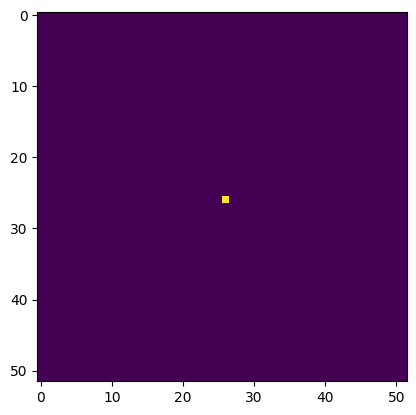

In [ ]:
fig, ax = plt.subplots()
heatmap=ax.imshow(drop[0])

def update(frame):
    # for each frame, update the data stored on each artist.
    im = drop[frame]
    # update the scatter plot:
    heatmap.set_data(im)
    return (heatmap)

ani = animation.FuncAnimation(fig=fig, func=update, frames=501, interval=10)
